In [1]:
import torch
from torch import nn
torch.__version__

'2.0.1+cu118'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
import requests
import zipfile
import matplotlib.pyplot as plt
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [4]:
import os 

def walk_through_dir(dir_path):
  
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories {len(filenames)} in directory {dirpath}')

In [5]:
walk_through_dir(image_path)

there are 2 directories 0 in directory data/pizza_steak_sushi
there are 3 directories 0 in directory data/pizza_steak_sushi/test
there are 0 directories 31 in directory data/pizza_steak_sushi/test/sushi
there are 0 directories 19 in directory data/pizza_steak_sushi/test/steak
there are 0 directories 25 in directory data/pizza_steak_sushi/test/pizza
there are 3 directories 0 in directory data/pizza_steak_sushi/train
there are 0 directories 72 in directory data/pizza_steak_sushi/train/sushi
there are 0 directories 75 in directory data/pizza_steak_sushi/train/steak
there are 0 directories 78 in directory data/pizza_steak_sushi/train/pizza


In [6]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/steak/922752.jpg
steak
Random image path: data/pizza_steak_sushi/train/steak/922752.jpg
iamge class: steak
Image height: 512
Image width: 384


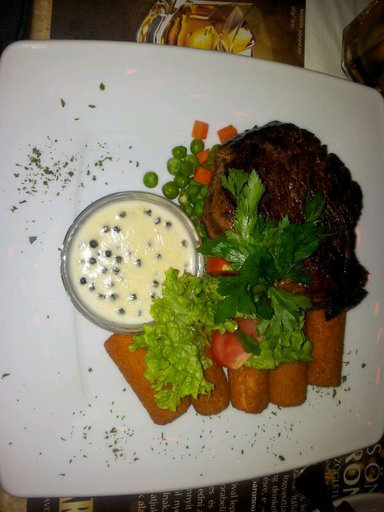

In [7]:
import random
from PIL import Image

#random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

random_image_path=random.choice(image_path_list)
print(random_image_path)

image_class=random_image_path.parent.stem
print(image_class)

img=Image.open(random_image_path)

print(f'Random image path: {random_image_path}')
print(f'iamge class: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [9]:
#writing a transform for our image
data_transform=transforms.Compose([
    
    #resize the image
    transforms.Resize(size=(64,64)),

    #FLIP THE IMAGES randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),

    #Turn the image into a torch tensor
    transforms.ToTensor()
])



In [10]:
data_transform(img)

tensor([[[0.1176, 0.1490, 0.2000,  ..., 0.0196, 0.0157, 0.0118],
         [0.0902, 0.1176, 0.1529,  ..., 0.0275, 0.0235, 0.0157],
         [0.0784, 0.0941, 0.1216,  ..., 0.0353, 0.0314, 0.0275],
         ...,
         [0.1059, 0.1255, 0.1333,  ..., 0.5451, 0.4902, 0.4000],
         [0.1765, 0.1843, 0.1961,  ..., 0.4196, 0.4235, 0.4039],
         [0.1529, 0.1647, 0.1647,  ..., 0.4078, 0.3922, 0.3569]],

        [[0.0510, 0.0824, 0.1569,  ..., 0.0235, 0.0235, 0.0157],
         [0.0353, 0.0549, 0.0941,  ..., 0.0353, 0.0275, 0.0235],
         [0.0275, 0.0471, 0.0549,  ..., 0.0392, 0.0353, 0.0314],
         ...,
         [0.0824, 0.1059, 0.1137,  ..., 0.5098, 0.4314, 0.3294],
         [0.1412, 0.1451, 0.1569,  ..., 0.3333, 0.3333, 0.3059],
         [0.1137, 0.1216, 0.1216,  ..., 0.3137, 0.2980, 0.2667]],

        [[0.0157, 0.0275, 0.0941,  ..., 0.0118, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0353,  ..., 0.0314, 0.0275, 0.0314],
         [0.0078, 0.0039, 0.0039,  ..., 0.0471, 0.0431, 0.

In [11]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [12]:
def plot_image(image_paths:list,transform,n=3,seed=None):

  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths,k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:

      fig,ax=plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\n Size:{f.size}')
      ax[0].axis(False)

      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Resized\n Size:{transformed_image.size}')
      ax[1].axis("off")

      fig.suptitle(f"Class : {image_path.parent.stem}",fontsize=16)




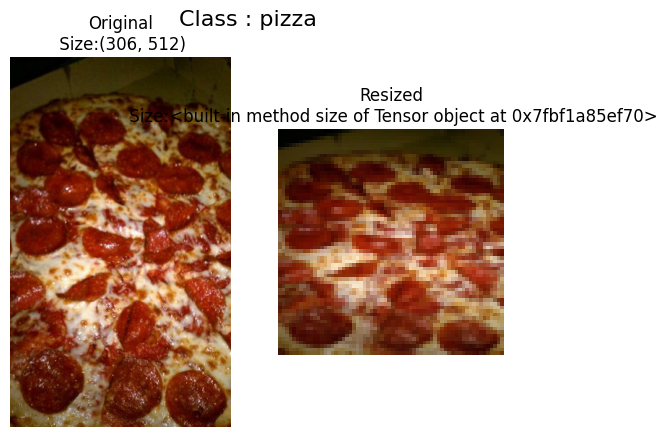

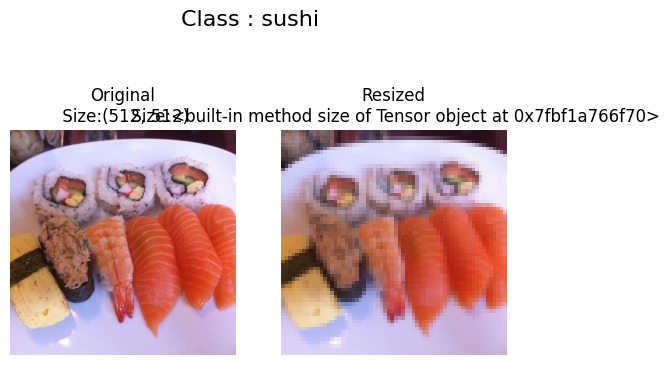

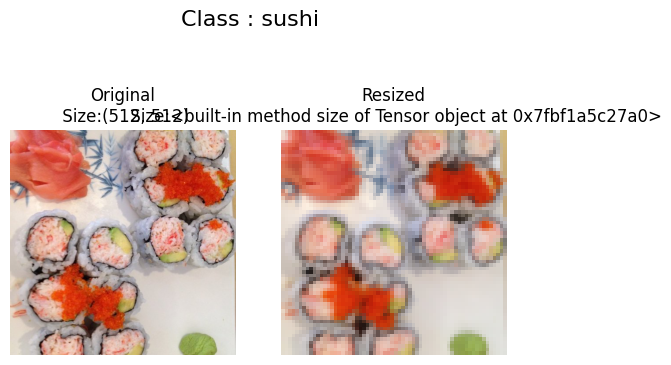

In [13]:
plot_image(image_paths=image_path_list,transform=data_transform,n=3,seed=42)

In [14]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
class_to_dict=train_data.class_to_idx
class_to_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
len(train_data),len(test_data)

(225, 75)

In [18]:
img,label=train_data[0] # Gives the image tensor and it's associated tensor
img,label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [19]:
class_names[label]

'pizza'

Original shape torch.Size([3, 64, 64])
Matplotlib shape torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

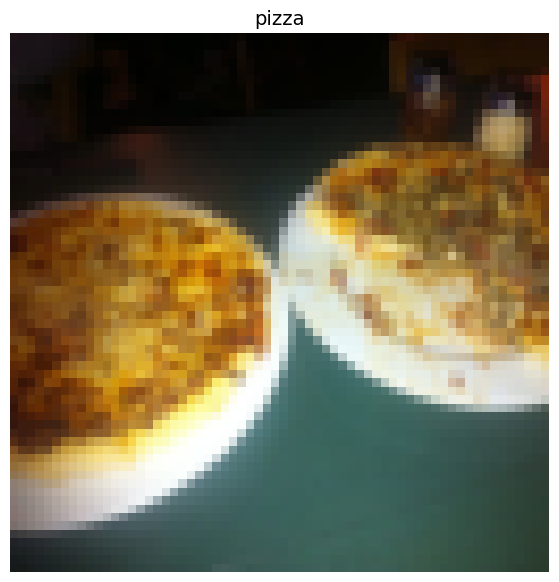

In [20]:
#plotting in matplotlib

img_permute=img.permute(1,2,0)

print("Original shape",img.shape)
print("Matplotlib shape",img_permute.shape)


plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

In [21]:
import os
os.cpu_count()

2

In [22]:
# Making a Dataloader
# With this we can convert our dataset into iterables
#we can customize the batchsize so that the model can take a batch at a time
# why we make batches of images - coz processing all of the data at the same time will take a lot of time and memory as well

from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),# number of cpu calls to load the data
                            shuffle=True) 

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=False)

len(train_dataloader),len(test_dataloader)



(225, 75)

In [23]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [24]:
#Custom Data loading function
# If ImageFolder would not have been there or our own ImageFolder for this 

##  Custom ImageFolder::::  ##

import os
import pathlib
import torch
from typing import List,Tuple,Dict
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms



In [25]:
#creating a helper function to get class names
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [26]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [27]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [28]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [29]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [30]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [31]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fbf184f3c10>,
 <__main__.ImageFolderCustom at 0x7fbfea433a90>)

In [32]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [33]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [34]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [35]:
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [36]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

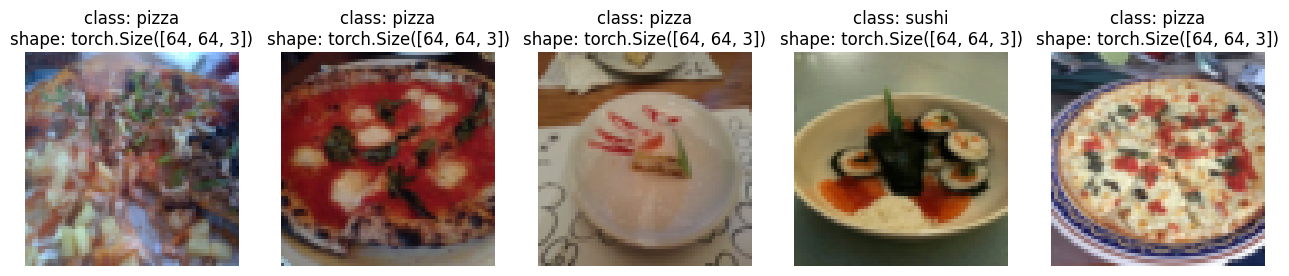

In [37]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


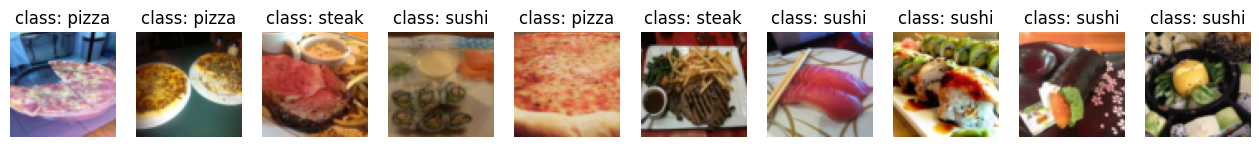

In [38]:
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None)

In [39]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fbf13793f40>,
 <torch.utils.data.dataloader.DataLoader at 0x7fbf13793130>)

In [40]:
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [41]:
from torchvision import transforms

train_transform=transforms.Compose([
                                    transforms.Resize(size=(224,224)),
                                    transforms.RandAugment(),
                                    transforms.ToTensor()
])

test_transform=transforms.Compose([
                                    transforms.Resize(size=(224,224)),
                                    transforms.ToTensor()
])



In [42]:
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/2385731.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/719108.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/46797.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/343036.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3837522.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/499605.jpg')]

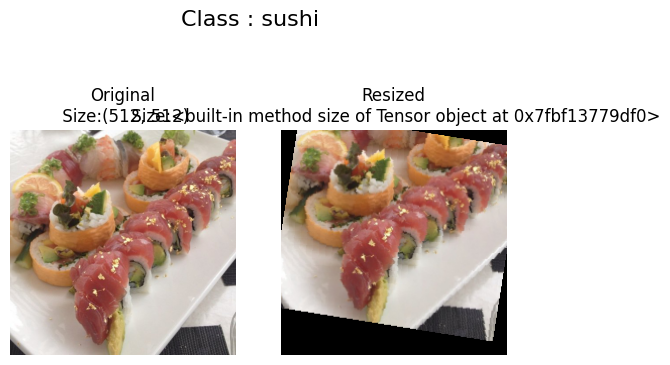

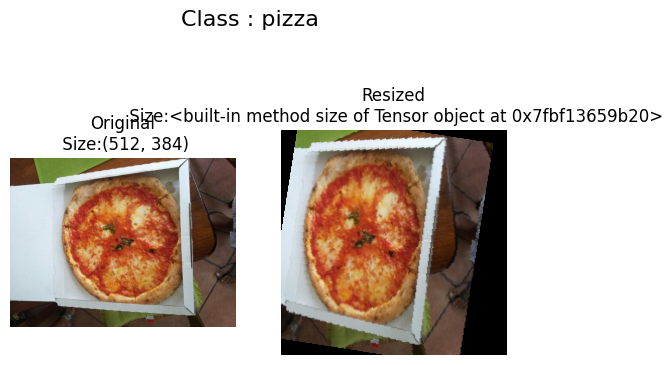

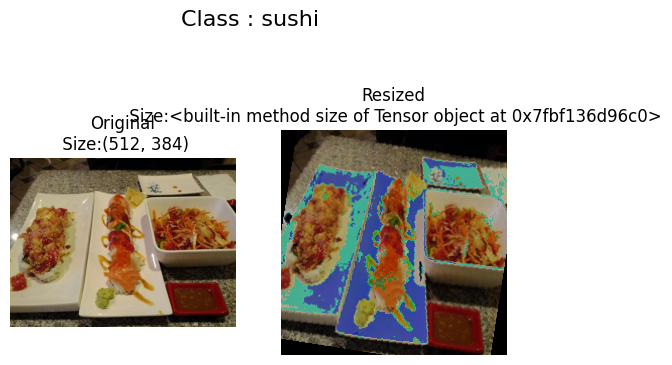

In [43]:
plot_image(image_path_list,train_transform,n=3,seed=None)

In [44]:
## model 0 :: TinyVGG model without data augmentation


simple_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.ToTensor()
                                     ])


# 1.) Load and Transform data
from torchvision import datasets
train_data_simple=datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir,transform=simple_transform)

# 2.) Turn Datasets into Dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple=DataLoader(dataset=train_data_simple,batch_size=BATCH_SIZE,shuffle=True,num_workers=NUM_WORKERS)

test_dataloader_simple=DataLoader(dataset=test_data_simple,batch_size=BATCH_SIZE,shuffle=False,num_workers=NUM_WORKERS)

In [45]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        #x = self.conv_block_1(x)
        # print(x.shape)
        #x = self.conv_block_2(x)
        # print(x.shape)
        #x = self.classifier(x)
        # print(x.shape)
        #return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [46]:
#Get a single batch image

image_batch,label_batch=next(iter(train_dataloader_simple))
image_batch,label_batch

(tensor([[[[0.9882, 0.9882, 0.9882,  ..., 0.2314, 0.2627, 0.2902],
           [0.9882, 0.9882, 0.9922,  ..., 0.2275, 0.2980, 0.2431],
           [0.9882, 0.9882, 0.9922,  ..., 0.2235, 0.3098, 0.2431],
           ...,
           [0.1137, 0.1176, 0.1176,  ..., 0.1765, 0.1843, 0.1804],
           [0.1294, 0.1412, 0.1255,  ..., 0.1412, 0.1294, 0.1373],
           [0.1451, 0.1451, 0.1255,  ..., 0.1216, 0.1255, 0.1216]],
 
          [[0.9490, 0.9569, 0.9529,  ..., 0.1490, 0.1686, 0.1961],
           [0.9451, 0.9608, 0.9804,  ..., 0.1529, 0.2078, 0.1882],
           [0.9333, 0.9569, 0.9882,  ..., 0.1725, 0.2431, 0.1686],
           ...,
           [0.0431, 0.0392, 0.0392,  ..., 0.1412, 0.1451, 0.1255],
           [0.0431, 0.0471, 0.0431,  ..., 0.1020, 0.0980, 0.1020],
           [0.0549, 0.0510, 0.0431,  ..., 0.0627, 0.0706, 0.0745]],
 
          [[0.8039, 0.7882, 0.7843,  ..., 0.2118, 0.2353, 0.2510],
           [0.7961, 0.8471, 0.8706,  ..., 0.1765, 0.2196, 0.2196],
           [0.7765, 0.84

In [47]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0637, 0.0615, 0.0382]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3364, 0.3357, 0.3279]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
1


In [48]:
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0352],
        [0.0658, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0375],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0348],
        [0.0620, 0.0599, 0.0370],
        [0.0607, 0.0628, 0.0387],
        [0.0637, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0690, 0.0330],
        [0.0557, 0.0570, 0.0357],
        [0.0631, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0369],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0638, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

In [49]:
#TorchInfo!!!!!!!!!!!!
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from torchinfo import summary

summary(model_0,input_size=(BATCH_SIZE,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [51]:
#TRAINING AND TESTING

# train_step - takes a model and a dataloader as input and trains the model on the dataloader
# test_step - takes a model and a dataloader as input and evaluates the model on the dataloader

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  model.train()

  train_loss,train_acc=0,0

  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)


    y_pred=model(X) # outputs logits

    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)

  train_loss= train_loss/len(dataloader)
  train_acc= train_acc/len(dataloader)

  return train_loss,train_acc


def test_step(model : torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module):
  

  model.eval()

  test_loss,test_acc=0,0

  with torch.inference_mode():

    for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)


      test_pred_logits=model(X)

      loss=loss_fn(test_pred_logits,y)
      test_loss+=loss.item()


      test_pred_labels=test_pred_logits.argmax(dim=1)
      test_acc+=(test_pred_labels==y).sum().item()/len(test_pred_labels)

    test_loss= test_loss/len(dataloader)
    test_acc= test_acc/len(dataloader)

    return test_loss,test_acc

        


In [52]:
# write a train function to combine the train_step and test_step
from tqdm import tqdm

def train(model : torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader,
          optimizer : torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs : int = 5):
  
  results={"train_loss" : [],
           "train_acc" : [],
           "test_loss" : [],
           "test_acc" : []
  }

  for epoch in tqdm(range(epochs)):

    train_loss,train_acc = train_step(model=model,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer)

    test_loss,test_acc = test_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn)


    print(
              f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | "
              f"train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | "
              f"test_acc: {test_acc:.4f}"
          )
    
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

  


In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5

model_0=TinyVGG(input_shape=3, #3 color channels
                hidden_units=10,
                output_shape=len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001)


from timeit import default_timer as timer
start_time=timer()



model_0_results=train(model=model_0,
                      train_dataloader=train_dataloader_simple,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)


end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")



 20%|██        | 1/5 [00:02<00:08,  2.04s/it]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1360 | test_acc: 0.2604


 40%|████      | 2/5 [00:03<00:05,  1.74s/it]

Epoch: 2 | train_loss: 1.0847 | train_acc: 0.4258 | test_loss: 1.1620 | test_acc: 0.1979


 60%|██████    | 3/5 [00:05<00:03,  1.86s/it]

Epoch: 3 | train_loss: 1.1157 | train_acc: 0.2930 | test_loss: 1.1697 | test_acc: 0.1979


 80%|████████  | 4/5 [00:07<00:02,  2.06s/it]

Epoch: 4 | train_loss: 1.0956 | train_acc: 0.4141 | test_loss: 1.1385 | test_acc: 0.1979


100%|██████████| 5/5 [00:09<00:00,  1.89s/it]

Epoch: 5 | train_loss: 1.0985 | train_acc: 0.2930 | test_loss: 1.1427 | test_acc: 0.1979
Total training time: 9.438 seconds
